In [1]:
### Imports (TODO remove this when finished)
%load_ext autoreload
%autoreload 2

# Append root folder in case you haven't installed NIDN
import sys
sys.path.append("../..")

import nidn

14:33:40|NIDN-INFO| Initialized NIDN for cpu
14:33:40|NIDN-INFO| Using double precision


# Single layer , uniform, regression

Physical wavelengths are (in meters):
[9.00000000e-07 7.36363636e-07 6.23076923e-07 5.40000000e-07
 4.76470588e-07 4.26315789e-07 3.85714286e-07 3.52173913e-07
 3.24000000e-07 3.00000000e-07]


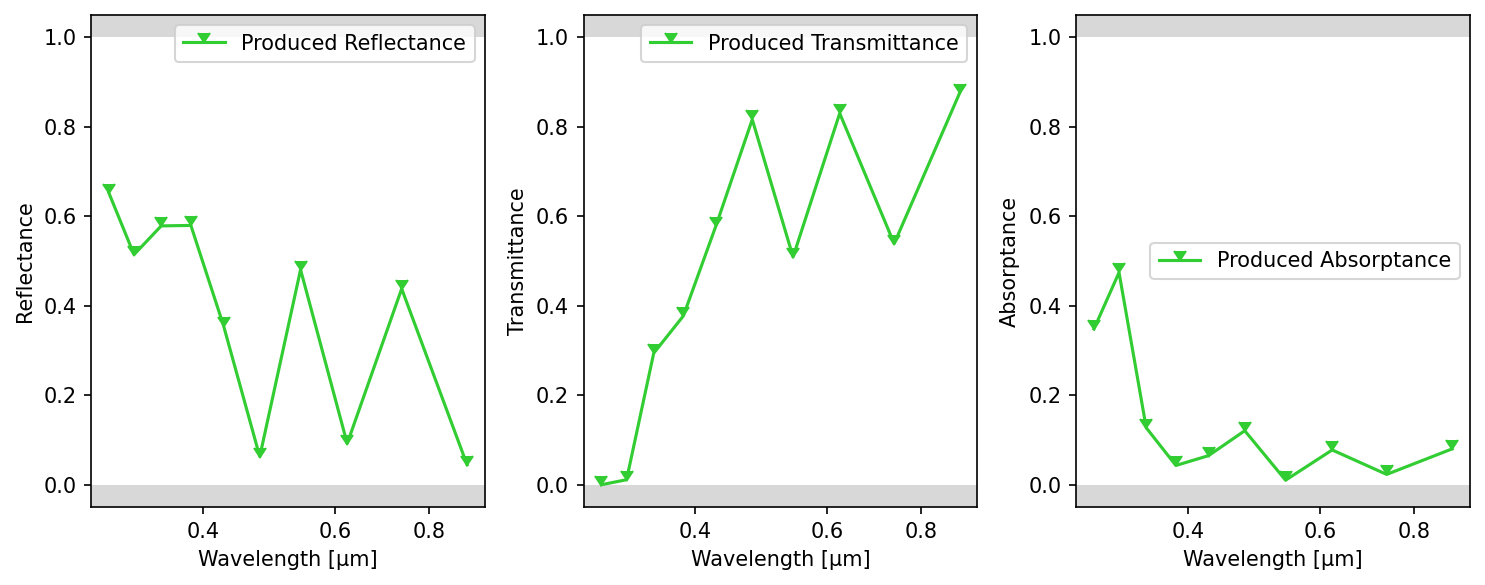

In [2]:
# Load default cfg as starting point
cfg = nidn.load_default_cfg()

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 3e-7
cfg.physical_wavelength_range[1] = 9e-7
cfg.PER_LAYER_THICKNESS = [0.38]

# Let's investigate 50 frequency points
cfg.N_freq = 10
cfg.solver = "FDTD"
cfg.FDTD_niter = 450
cfg.N_layers = 1
cfg.FDTD_pulse_type = 'continuous'
cfg.FDTD_source_type = 'line'

# Currently, the target spectra is set manually as a list of numbers. Choose each 5th value to reduce from 100 frequency points to 20 frequency points
cfg.target_reflectance_spectrum = [0.04456351,0.07616634,0.12983103,0.20348341,0.20803709,0.28212550,0.34838794,0.35148116,0.40294107,0.43659179,0.43804083,0.45265764,0.42395525,0.42250250,0.35184451,0.34927237,0.23594347,0.22968049,0.10109031,0.09566545,0.09204569,0.04801336,0.04943829,0.15785883,0.16480385,0.33755576,0.34852490,0.35598405,0.47175452,0.47543828,0.48079059,0.47670861,0.47495085,0.47283219,0.33080953,0.31996884,0.30833286,0.29704388,0.07221731,0.06803254,0.06279853,0.25093825,0.27168874,0.29327866,0.31555886,0.52987157,0.53266849,0.53949557,0.54329768,0.54590920,0.35588414,0.34058632,0.30762652,0.27317067,0.16839377,0.20723618,0.25279078,0.27902083,0.33203165,0.38699248,0.57960660,0.56132624,0.54713063,0.50812035,0.47987271,0.40737469,0.31942957,0.41918578,0.46946234,0.55008628,0.57858655,0.60237008,0.22992761,0.32204145,0.38371327,0.44023784,0.49577304,0.49328186,0.46340183,0.45237985,0.51436802,0.52561688,0.53433126,0.54193417,0.55985565,0.56738637,0.57371749,0.57877213,0.65791848,0.65526587,0.65189846,0.64806130,0.64002900,0.63579534,0.63167151,0.62771639,0.62199316,0.66017008,0.65453985,0.64911847,][0::10]
cfg.target_transmittance_spectrum =[0.87536937,0.86225903,0.81306321,0.75287122,0.74871316,0.68198832,0.62422039,0.62128133,0.57431380,0.54036076,0.53893761,0.53746136,0.56318135,0.56430514,0.62822533,0.63025375,0.72190201,0.72902601,0.82516558,0.82823149,0.83023419,0.85988161,0.85803865,0.77452468,0.76844363,0.62843653,0.61871883,0.61209847,0.51762058,0.51417495,0.50911674,0.50285459,0.50413010,0.50572154,0.62959830,0.63739662,0.64559040,0.65416174,0.81584808,0.81671772,0.81649914,0.67631454,0.65980186,0.64488775,0.62678816,0.44563180,0.44270788,0.43865578,0.43446768,0.43148086,0.57915950,0.58924005,0.61020821,0.63242840,0.68207222,0.65677377,0.62419689,0.60660547,0.57197304,0.53173307,0.37738633,0.39192256,0.40217924,0.42987445,0.44531120,0.47829903,0.49511773,0.42511123,0.39097864,0.32282715,0.29403716,0.25334013,0.33381818,0.24619652,0.20109781,0.16036236,0.10121669,0.07910624,0.04449772,0.03074843,0.01117523,0.00339080,0.00167748,0.00077300,0.00015712,0.00006627,0.00003636,0.00001924,0.00000530,0.00000348,0.00000238,0.00000169,0.00000096,0.00000075,0.00000060,0.00000048,0.00000034,0.00000030,0.00000024,0.00000019,][0::10]

nidn.plot_spectrum(cfg,
                   cfg.target_reflectance_spectrum,
                   cfg.target_transmittance_spectrum)

physical_wls, normalized_freqs = nidn.get_frequency_points(cfg)
print("Physical wavelengths are (in meters):")
print(physical_wls)

In [3]:
cfg.pop("model",None); # Forget the old model

# Allowed range of epsilon values
cfg.real_min_eps = 0.00
cfg.real_max_eps = 20.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 6.0

cfg.type = "regression" # Choose type as described above

In [4]:
nidn.print_cfg(cfg)

name                   : example_name   |use_gpu                : 0              |seed                   : 100            |
model_type             : siren          |iterations             : 3000           |learning_rate          : 8e-05          |
type                   : regression     |reg_loss_weight        : 0.05           |use_regularization_loss: 1              |
L                      : 1.0            |absorption_loss        : 0              |n_neurons              : 100            |
hidden_layers          : 9              |encoding_dim           : 4              |siren_omega            : 1.0            |
add_noise              : 0              |noise_scale            : 0.001          |eps_oversampling       : 1              |
real_min_eps           : 0.0            |real_max_eps           : 20.0           |imag_min_eps           : 0.0            |
imag_max_eps           : 6.0            |solver                 : FDTD           |Nx                     : 1              |
Ny      

In [5]:
cfg.iterations = 150 # Set number of training iterations (that is forward model evaluations) to perform
nidn.run_training(cfg);

14:33:59|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
14:34:41|NIDN-INFO| ###  New Best=0.3357 with SpectrumLoss=0.3357 ### L1=0.3357
14:34:41|NIDN-INFO| It=0     Loss=0.3357   |  weighted_avg=0.3357  |  SpectrumLoss=0.3357 | L1=0.3357
14:35:20|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
14:36:35|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
14:37:14|NIDN-INFO| ###  New Best=0.3335 with SpectrumLoss=0.3335 ### L1=0.3335
14:37:52|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
14:38:30|NIDN-INFO| ###  New Best=0.3184 with SpectrumLoss=0.3184 ### L1=0.3184
14:39:04|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
14:39:41|NIDN-INFO| ###

15:12:54|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
15:13:43|NIDN-INFO| ###  New Best=0.1325 with SpectrumLoss=0.1325 ### L1=0.1325
15:13:43|NIDN-INFO| It=30    Loss=0.1325   |  weighted_avg=0.1761  |  SpectrumLoss=0.1325 | L1=0.1325
15:14:15|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
15:15:12|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
15:16:06|NIDN-INFO| ###  New Best=0.1290 with SpectrumLoss=0.1290 ### L1=0.1290
15:16:43|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
15:17:15|NIDN-INFO| ###  New Best=0.1247 with SpectrumLoss=0.1247 ### L1=0.1247
15:17:49|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
15:18:50|NIDN-WARNING| 

15:52:46|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
15:53:17|NIDN-INFO| It=65    Loss=0.0930   |  weighted_avg=0.0993  |  SpectrumLoss=0.0930 | L1=0.0930
15:53:45|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
15:54:50|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
15:55:51|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
15:56:28|NIDN-INFO| ###  New Best=0.0894 with SpectrumLoss=0.0894 ### L1=0.0894
15:57:02|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
15:57:59|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
15:58:37|NIDN-INFO| It=70    Loss=0.0910   |  weighted_a

16:36:00|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
16:37:16|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
16:38:32|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
16:39:15|NIDN-INFO| It=105   Loss=0.0718   |  weighted_avg=0.0731  |  SpectrumLoss=0.0718 | L1=0.0718
16:39:48|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
16:41:05|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
16:42:13|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
16:43:29|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
16:44:36|

17:25:03|NIDN-INFO| It=145   Loss=0.0586   |  weighted_avg=0.0631  |  SpectrumLoss=0.0586 | L1=0.0586
17:25:30|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
17:26:30|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
17:27:29|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
17:28:27|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm


17:30:00|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm


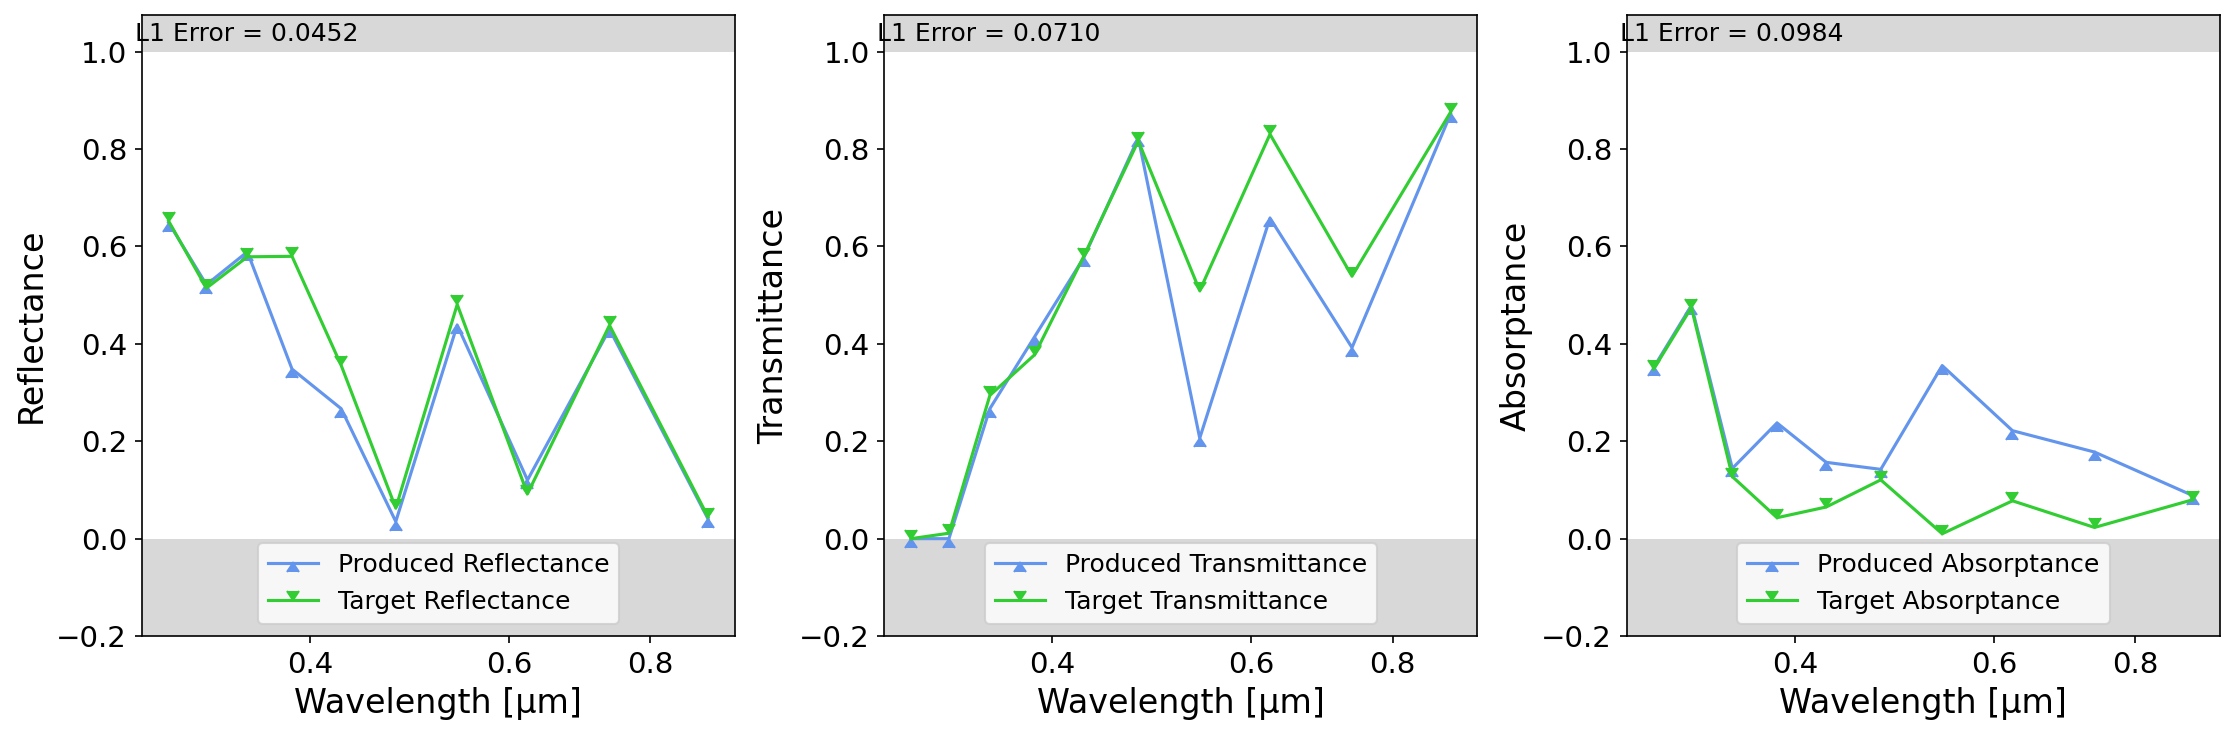

In [6]:
nidn.plot_spectra(cfg)

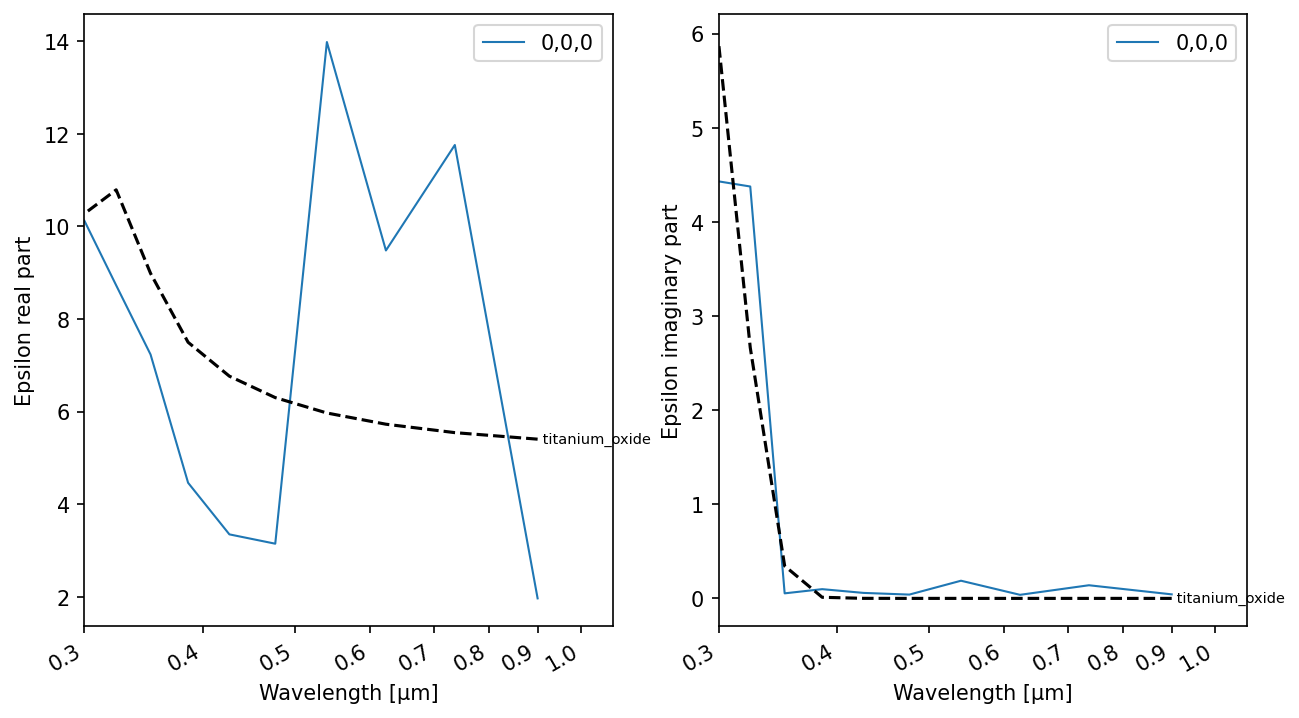

In [7]:
nidn.plot_eps_per_point(cfg,compare_to_material="titanium_oxide")

In [ ]:
cfg.name = "1layer_fdtd_reg"
nidn.save_run(cfg)

# Single layer , uniform, classification

In [8]:
cfg.pop("model",None); # Forget the old model

# Allowed range of epsilon values
cfg.real_min_eps = 0.0
cfg.real_max_eps = 20.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 6.0

cfg.type = "classification" # Choose type as described above
cfg.iterations = 150 # Set number of training iterations (that is forward model evaluations) to perform

In [9]:
nidn.run_training(cfg);

17:31:17|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
17:31:49|NIDN-INFO| ###  New Best=0.3131 with SpectrumLoss=0.3081 ### L1=0.3081
17:31:49|NIDN-INFO| It=0     Loss=0.3131   |  weighted_avg=0.3131  |  SpectrumLoss=0.3081 | L1=0.3081
17:32:16|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
17:32:47|NIDN-INFO| ###  New Best=0.2841 with SpectrumLoss=0.2795 ### L1=0.2795
17:33:15|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
17:33:46|NIDN-INFO| ###  New Best=0.2292 with SpectrumLoss=0.2242 ### L1=0.2242
17:34:14|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
17:34:47|NIDN-INFO| ###  New Best=0.1463 with SpectrumLoss=0.1415 ### L1=0.1415
17:35:15|NIDN-WARNING| Due to the grid resultion, the thickness of lay

18:06:57|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
18:07:35|NIDN-INFO| It=35    Loss=0.0441   |  weighted_avg=0.0454  |  SpectrumLoss=0.0404 | L1=0.0404
18:08:02|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
18:09:03|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
18:10:03|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
18:11:00|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
18:11:59|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
18:12:30|NIDN-INFO| It=40    Loss=0.0405   |  weighted_avg=0.0434  |  SpectrumLoss=0.0369 | L1=0.0369
18:12:58|NIDN-WARNING| Due to the 

18:49:59|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
18:50:32|NIDN-INFO| ###  New Best=0.0379 with SpectrumLoss=0.0346 ### L1=0.0346
18:51:08|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
18:52:04|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
18:53:11|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
18:53:45|NIDN-INFO| It=80    Loss=0.0402   |  weighted_avg=0.0400  |  SpectrumLoss=0.0371 | L1=0.0371
18:54:12|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
18:55:13|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
18:56:10|NIDN-WARNING| Due to the grid resultion, the th

19:31:01|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
19:31:58|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
19:32:29|NIDN-INFO| ###  New Best=0.0370 with SpectrumLoss=0.0337 ### L1=0.0337
19:33:02|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
19:33:58|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
19:34:38|NIDN-INFO| ###  New Best=0.0369 with SpectrumLoss=0.0337 ### L1=0.0337
19:35:08|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm
19:35:38|NIDN-INFO| It=120   Loss=0.0382   |  weighted_avg=0.0379  |  SpectrumLoss=0.0350 | L1=0.0350
19:36:06|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead o

20:10:50|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.360 µm instead of the specified 0.38 µm


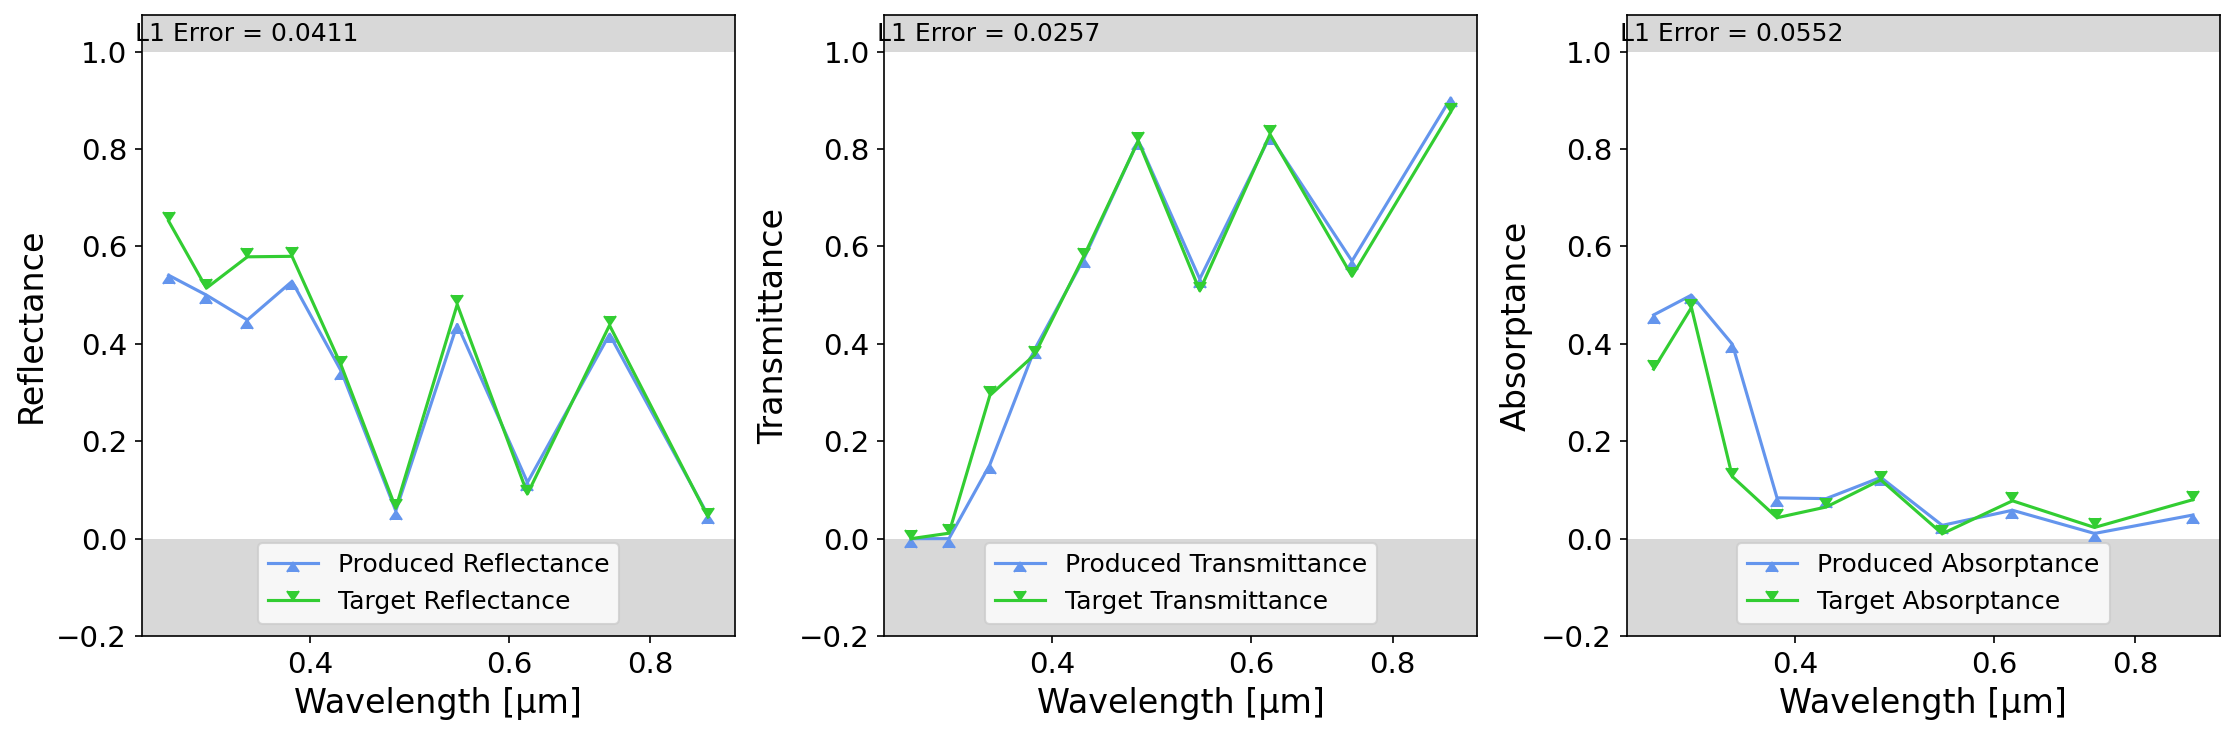

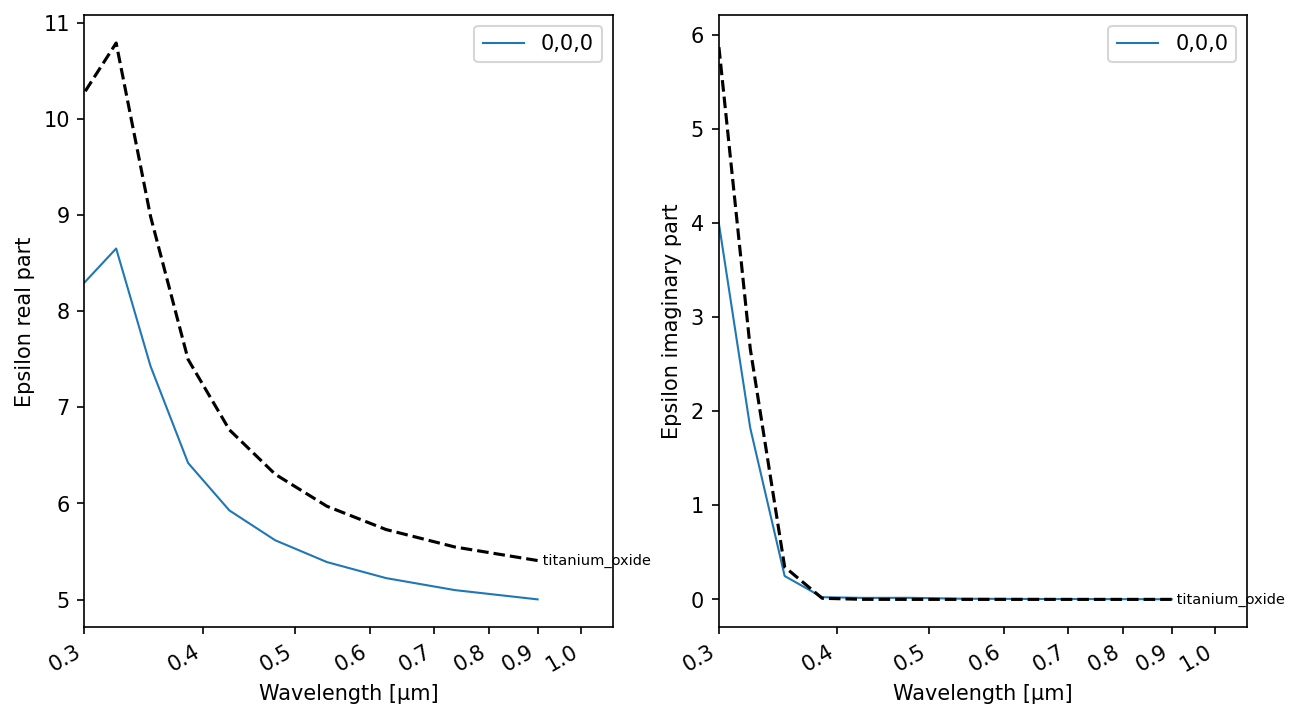

In [10]:
nidn.plot_spectra(cfg)
nidn.plot_eps_per_point(cfg)

In [ ]:
cfg.name = "1layer_fdtd_class"
nidn.save_run(cfg)

## Uniform Three-Layer Ground Truth 

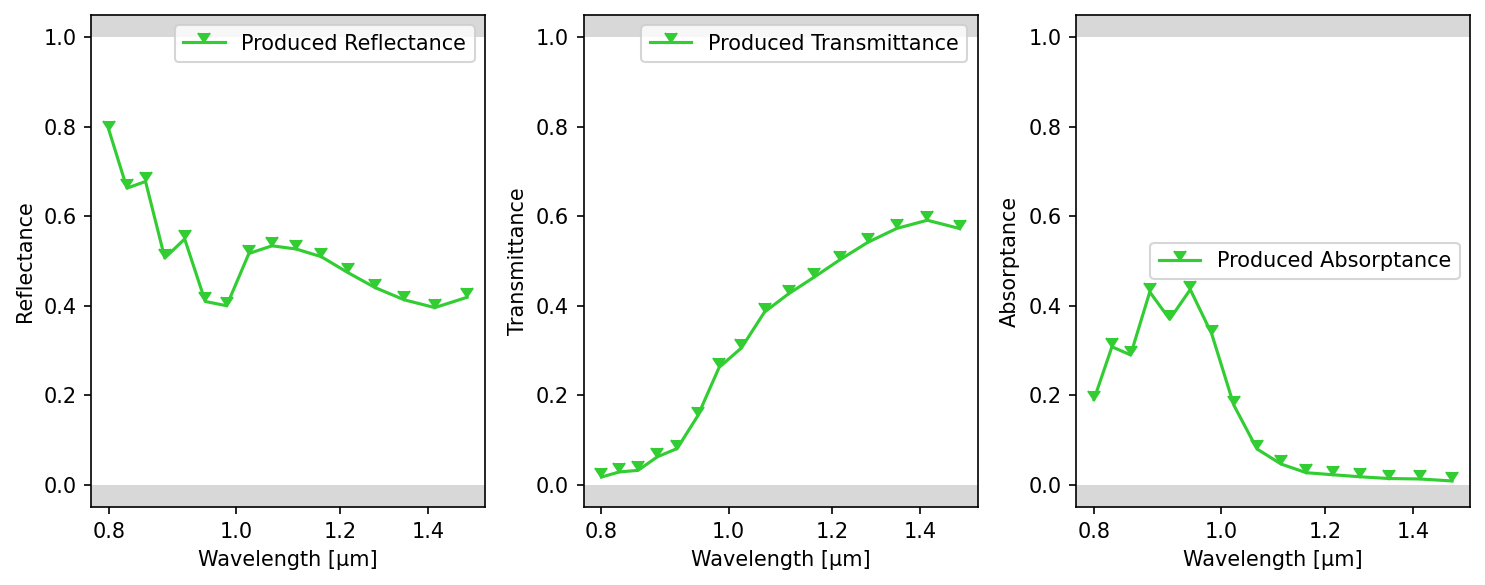

In [2]:
# Load default cfg as starting point
cfg = nidn.load_default_cfg()

# Set grid specifics
cfg.Nx = 1
cfg.Ny = 1
cfg.N_layers = 3
cfg.N_freq = 16
cfg.PER_LAYER_THICKNESS = [0.1]
cfg.FDTD_pulse_type = 'continuous'
cfg.FDTD_source_type = 'line'

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 8e-7 
cfg.physical_wavelength_range[1] = 1.5e-6

cfg.target_reflectance_spectrum = [0.41897427,0.39591158,0.41332836,0.44050670,0.47452302,0.50973356,0.52690292,0.53404939,0.51684631,0.40007779,0.40960854,0.54935004,0.50675232,0.67787965,0.66292254,0.79244483,]
cfg.target_transmittance_spectrum = [0.57266058,0.59123892,0.57286972,0.54174457,0.50317150,0.46341936,0.42688453,0.38601254,0.30563326,0.26237625,0.15404439,0.08091528,0.06232964,0.03206342,0.02864806,0.01709644,]

cfg.FDTD_niter = 500
cfg.solver ="FDTD"

nidn.plot_spectrum(cfg,
                   cfg.target_reflectance_spectrum,
                   cfg.target_transmittance_spectrum)

In [3]:
# Allowed range of epsilon values
cfg.pop("model",None); # Forget the old model
cfg.real_min_eps = 0.1
cfg.real_max_eps = 20.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 20.0

cfg.type = "regression" # Choose type as described above (for now still regression)
cfg.iterations = 100 # Set number of training iterations (that is forward model evaluations) to perform

In [4]:
nidn.run_training(cfg);

23:11:08|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
23:12:05|NIDN-INFO| ###  New Best=0.2211 with SpectrumLoss=0.2211 ### L1=0.2211
23:12:05|NIDN-INFO| It=0     Loss=0.2211   |  weighted_avg=0.2211  |  SpectrumLoss=0.2211 | L1=0.2211
23:12:57|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
23:12:57|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
23:12:57|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
23:13:54|NIDN-INFO| ###  New Best=0.1942 with SpectrumLoss=0.1942 ### L1=0.1942
23:14:47|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
23:14:47|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the

23:36:27|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
23:36:27|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
23:37:20|NIDN-INFO| ###  New Best=0.1593 with SpectrumLoss=0.1593 ### L1=0.1593
23:38:08|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
23:38:08|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
23:38:08|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
23:38:59|NIDN-INFO| It=15    Loss=0.1594   |  weighted_avg=0.1733  |  SpectrumLoss=0.1594 | L1=0.1594
23:39:53|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
23:39:53|NIDN-WARNING| Due to the grid resultion, the thicknes

00:04:05|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
00:04:05|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
00:05:28|NIDN-INFO| ###  New Best=0.1491 with SpectrumLoss=0.1491 ### L1=0.1491
00:06:29|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
00:06:29|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
00:06:29|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
00:07:27|NIDN-INFO| ###  New Best=0.1469 with SpectrumLoss=0.1469 ### L1=0.1469
00:07:28|NIDN-INFO| It=30    Loss=0.1469   |  weighted_avg=0.1554  |  SpectrumLoss=0.1469 | L1=0.1469
00:08:16|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the

00:30:18|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
00:30:18|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
00:31:12|NIDN-INFO| ###  New Best=0.1322 with SpectrumLoss=0.1322 ### L1=0.1322
00:32:00|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
00:32:00|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
00:32:00|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
00:32:53|NIDN-INFO| ###  New Best=0.1308 with SpectrumLoss=0.1308 ### L1=0.1308
00:33:43|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
00:33:43|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to

00:57:21|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
00:59:03|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
00:59:03|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
00:59:03|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
01:01:05|NIDN-INFO| ###  New Best=0.1193 with SpectrumLoss=0.1193 ### L1=0.1193
01:01:53|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
01:01:53|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
01:01:53|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
01:03:22|NIDN-INFO| ###  New Best=0.11

01:27:49|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
01:27:49|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
01:27:50|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
01:29:31|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
01:29:31|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
01:29:31|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
01:31:11|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
01:31:11|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified

01:56:05|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
01:56:05|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
01:59:02|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
01:59:02|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
01:59:02|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
01:59:56|NIDN-INFO| ###  New Best=0.1033 with SpectrumLoss=0.1033 ### L1=0.1033
02:00:50|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
02:00:50|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
02:00:50|NIDN-WARNING| Due to the grid

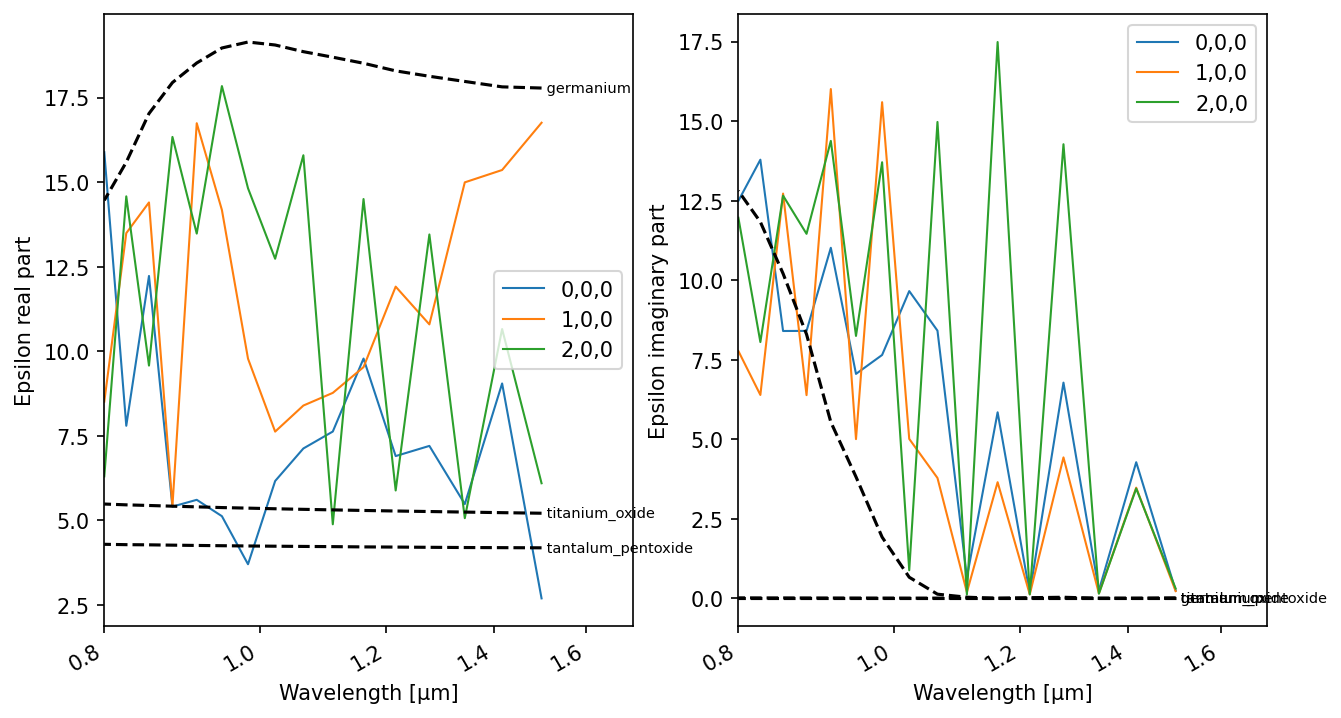

In [5]:
nidn.plot_eps_per_point(cfg,compare_to_material=["titanium_oxide","germanium","tantalum_pentoxide"])

02:21:53|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
02:21:53|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
02:21:53|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm


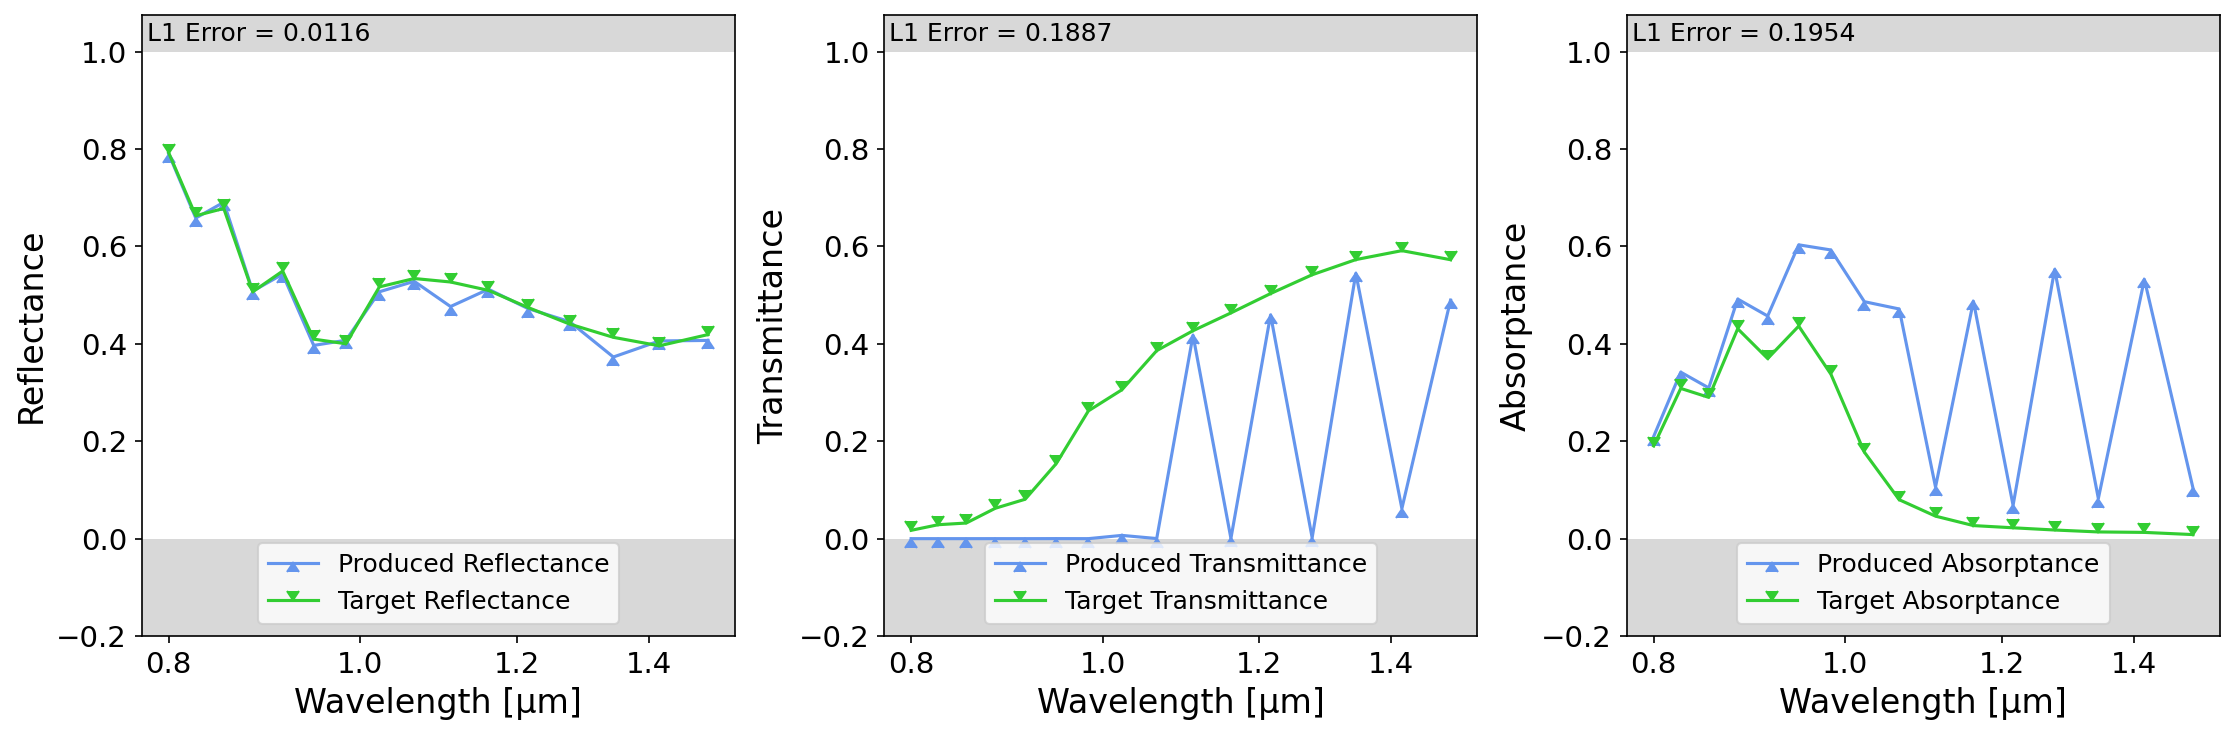

In [6]:
# The other plots
nidn.plot_spectra(cfg)

In [ ]:
cfg.name = "3layer_fdtd_reg"
nidn.save_run(cfg)

In [7]:
# Allowed range of epsilon values
cfg.pop("model",None); # Forget the old model

cfg.type = "classification" # Choose type as described above (for now still regression)
cfg.iterations = 100 # Set number of training iterations (that is forward model evaluations) to perform

In [8]:
nidn.run_training(cfg);

02:23:33|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
02:23:33|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
02:23:33|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
02:24:33|NIDN-INFO| ###  New Best=0.1448 with SpectrumLoss=0.1404 ### L1=0.1404
02:24:33|NIDN-INFO| It=0     Loss=0.1448   |  weighted_avg=0.1448  |  SpectrumLoss=0.1404 | L1=0.1404
02:25:21|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
02:25:21|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
02:25:21|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
02:26:18|NIDN-INFO| ###  New Best=0.0950 with SpectrumLoss=0.0

02:47:51|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
02:47:51|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
02:47:51|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
02:49:10|NIDN-INFO| ###  New Best=0.0485 with SpectrumLoss=0.0443 ### L1=0.0443
02:50:05|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
02:50:05|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
02:50:05|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
02:50:55|NIDN-INFO| It=15    Loss=0.0486   |  weighted_avg=0.0717  |  SpectrumLoss=0.0446 | L1=0.0446
02:51:41|NIDN-WARNING| Due to the grid resultion, the thicknes

03:16:37|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
03:18:21|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
03:18:21|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
03:18:21|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
03:19:13|NIDN-INFO| It=30    Loss=0.0431   |  weighted_avg=0.0465  |  SpectrumLoss=0.0395 | L1=0.0395
03:20:01|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
03:20:01|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
03:20:01|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
03:21:41|NIDN-WA

03:45:20|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
03:45:20|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
03:45:20|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
03:46:56|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
03:46:56|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
03:46:56|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
03:48:51|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
03:48:51|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified

04:13:25|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
04:13:25|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
04:13:25|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
04:14:19|NIDN-INFO| ###  New Best=0.0409 with SpectrumLoss=0.0374 ### L1=0.0374
04:15:17|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
04:15:17|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
04:15:17|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
04:16:54|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
04:16:54|NIDN-WARNING| Due to the grid

04:40:34|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
04:42:15|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
04:42:15|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
04:42:15|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
04:43:55|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
04:43:55|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
04:43:55|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
04:44:46|NIDN-INFO| It=80    Loss=0.0412   |  weighted_avg=0.0416  |  SpectrumLoss=0.0378 | L1=0.0378
04:45:34|NIDN-WA

05:11:36|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
05:13:16|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
05:13:16|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
05:13:16|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
05:14:09|NIDN-INFO| It=95    Loss=0.0406   |  weighted_avg=0.0411  |  SpectrumLoss=0.0371 | L1=0.0371
05:15:04|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
05:15:04|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
05:15:04|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
05:16:06|NIDN-IN

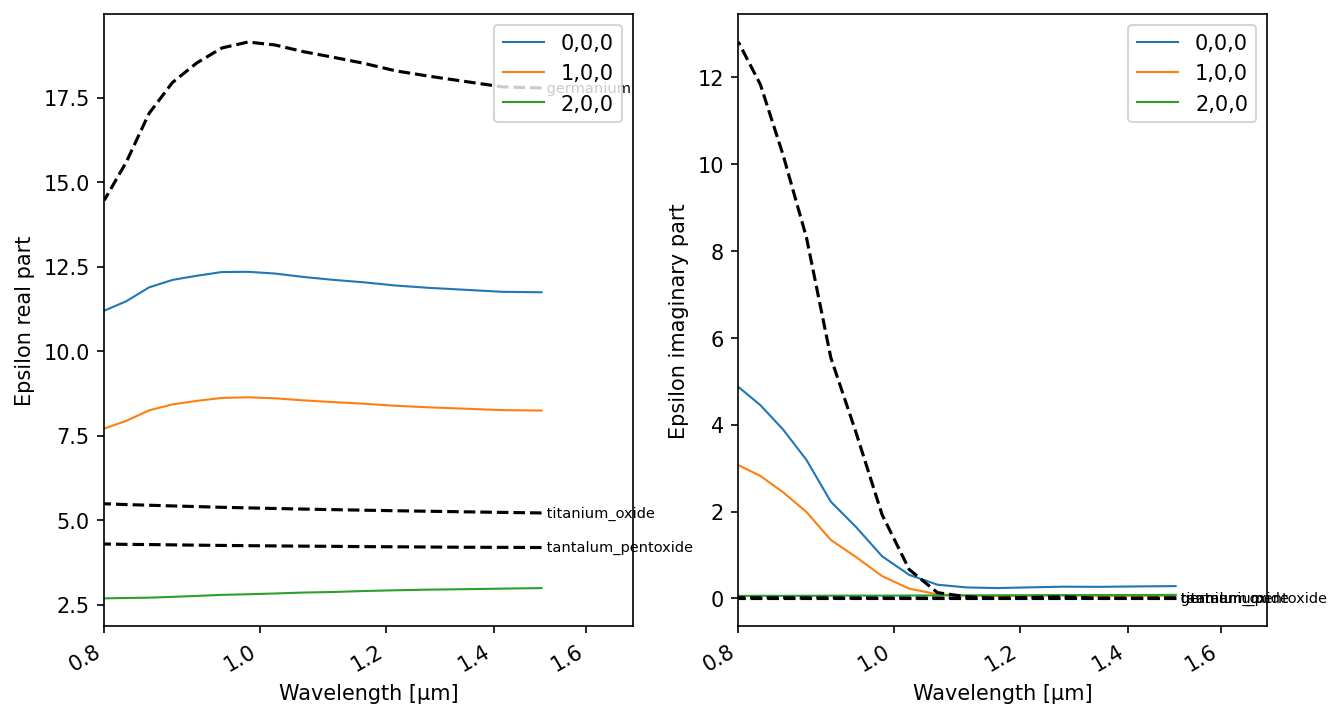

In [9]:
nidn.plot_eps_per_point(cfg,compare_to_material=["titanium_oxide","germanium","tantalum_pentoxide"])

05:24:08|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
05:24:08|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
05:24:08|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm


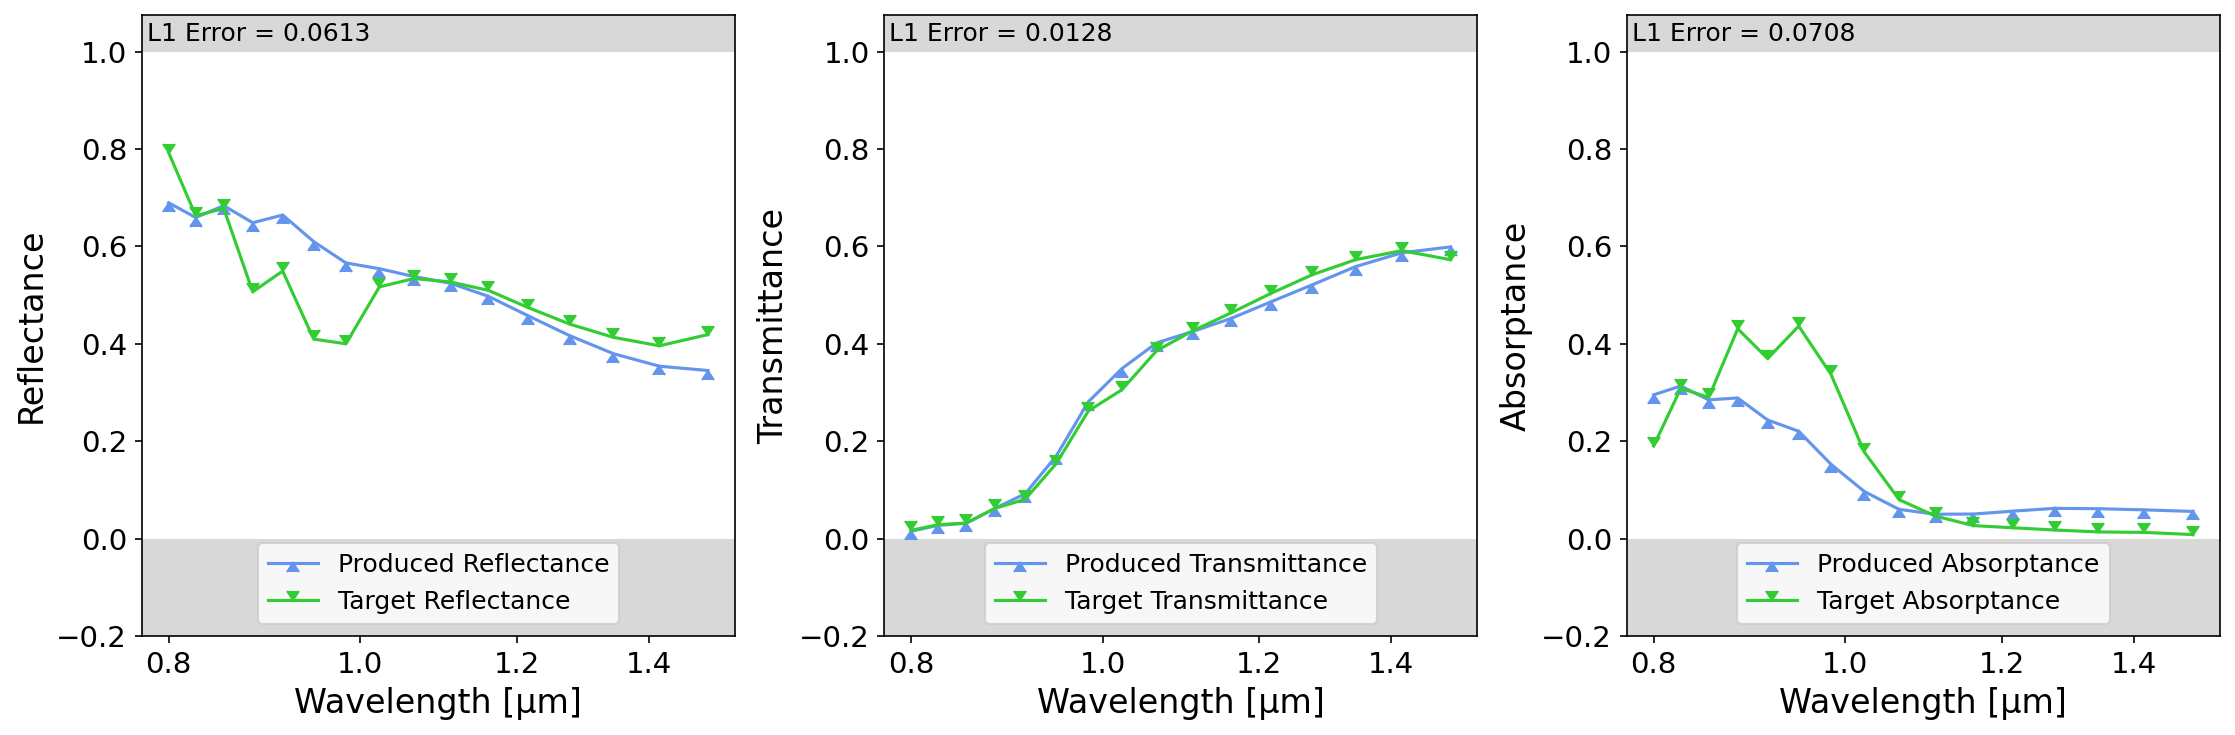

In [10]:
nidn.plot_spectra(cfg)

In [ ]:
cfg.name = "3layer_fdtd_class"
nidn.save_run(cfg)